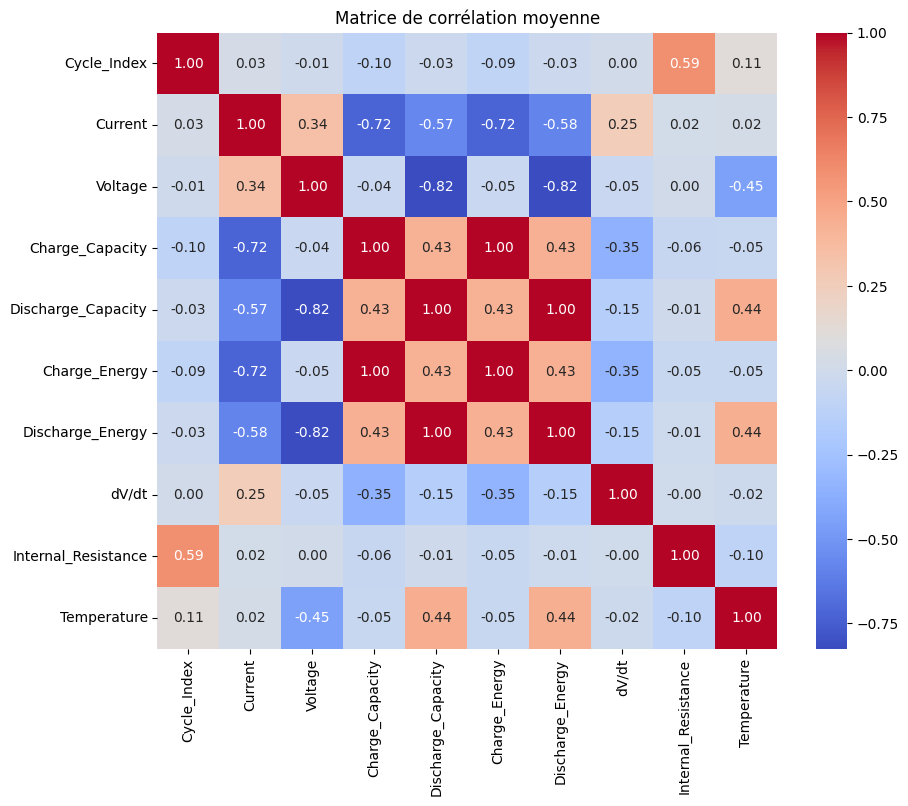

In [2]:
import os
import pandas as pd


# Chemin vers le répertoire contenant les fichiers CSV
data_path = r'C:\\Users\\pc\\Desktop\\data\\all batchs'

# Lister tous les fichiers CSV dans le répertoire donné
csv_files = [f for f in os.listdir(data_path) if f.endswith('.csv')]

# Initialiser une matrice cumulative avec des zéros
cumulative_correlation_matrix = None
n_files = len(csv_files)

# Parcourir chaque fichier CSV
for csv_file in csv_files:
    file_path = os.path.join(data_path, csv_file)
    
    # Lire le fichier CSV
    df = pd.read_csv(file_path)
    
    # Supprimer la colonne 'Data_Point' si elle existe
    if 'Data_Point' in df.columns:
        df = df.drop(columns=['Data_Point'])
    
    # Calculer la matrice de corrélation
    correlation_matrix = df.corr()
    
    # Ajouter la matrice de corrélation à la matrice cumulative
    if cumulative_correlation_matrix is None:
        cumulative_correlation_matrix = correlation_matrix
    else:
        cumulative_correlation_matrix += correlation_matrix

# Diviser la matrice cumulative par le nombre total de fichiers pour obtenir la moyenne
average_correlation_matrix = cumulative_correlation_matrix / n_files

# Optionnel : Afficher la matrice de corrélation moyenne sous forme de carte thermique (heatmap)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(average_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation moyenne')
plt.show()


Fichier: 2017-05-12_3_6C-80per_3_6C_CH1.csv - Chargé avec succès
Nombre de lignes et de colonnes : (1941441, 11)


Fichier: 2017-05-12_3_6C-80per_3_6C_CH1.csv - Aucune valeur manquante détectée


Fichier: 2017-05-12_3_6C-80per_3_6C_CH1.csv - Aucune ligne dupliquée détectée


Fichier: 2017-05-12_3_6C-80per_3_6C_CH1.csv - Colonne: Voltage - 170473 valeurs aberrantes détectées
Fichier: 2017-05-12_3_6C-80per_3_6C_CH1.csv - Colonne: Charge_Capacity - 216198 valeurs aberrantes détectées
Fichier: 2017-05-12_3_6C-80per_3_6C_CH1.csv - Colonne: Discharge_Capacity - 197 valeurs aberrantes détectées
Fichier: 2017-05-12_3_6C-80per_3_6C_CH1.csv - Colonne: Charge_Energy - 212174 valeurs aberrantes détectées
Fichier: 2017-05-12_3_6C-80per_3_6C_CH1.csv - Colonne: Discharge_Energy - 201 valeurs aberrantes détectées
Fichier: 2017-05-12_3_6C-80per_3_6C_CH1.csv - Colonne: dV/dt - 528128 valeurs aberrantes détectées
Fichier: 2017-05-12_3_6C-80per_3_6C_CH1.csv - Colonne: Internal_Resistance - 9948 valeurs ab

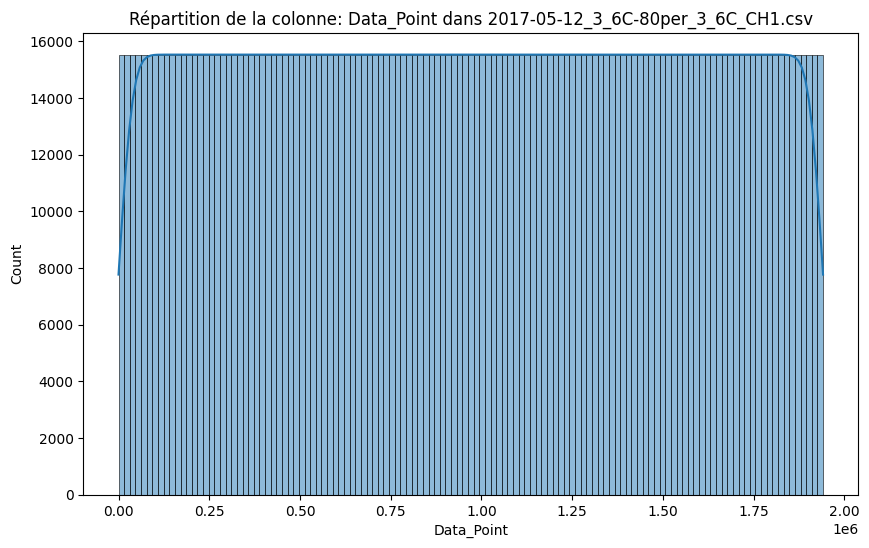

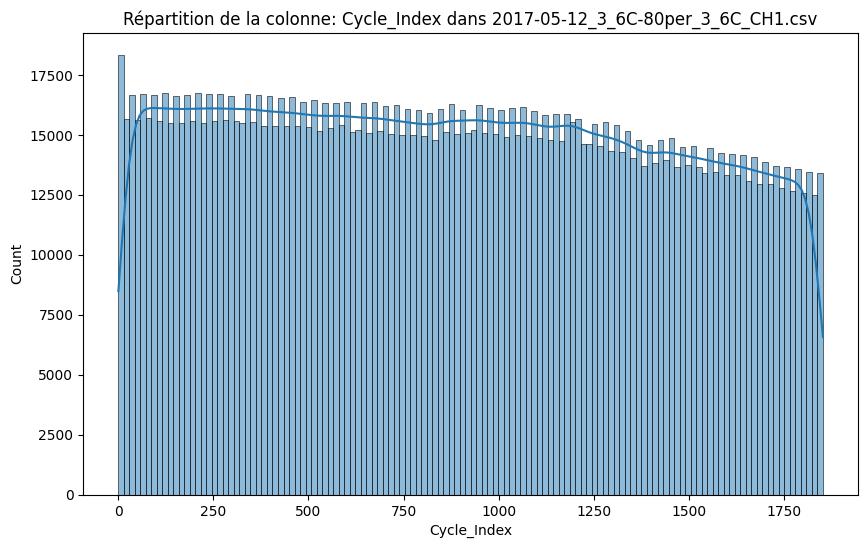

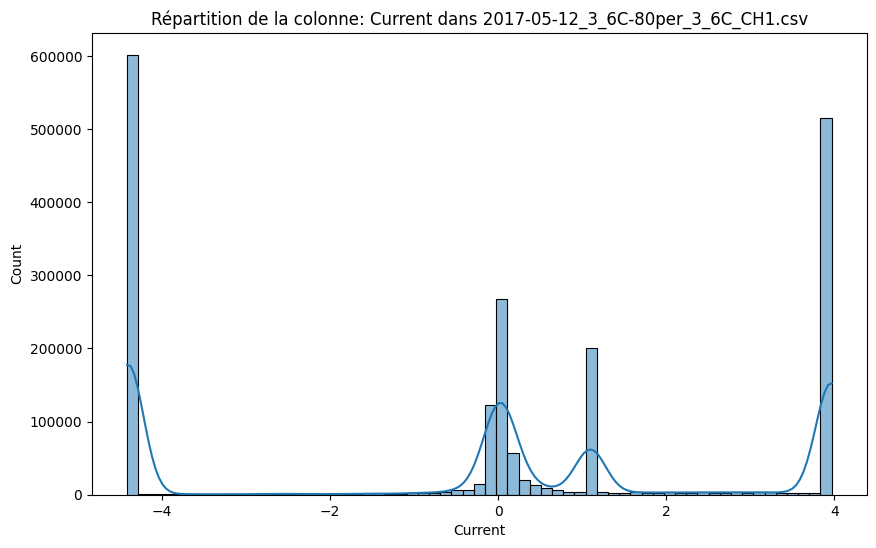

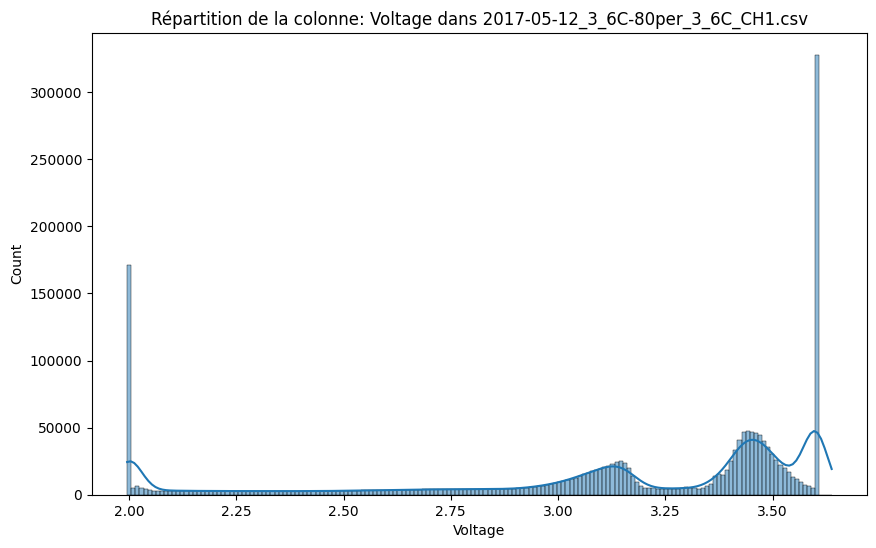

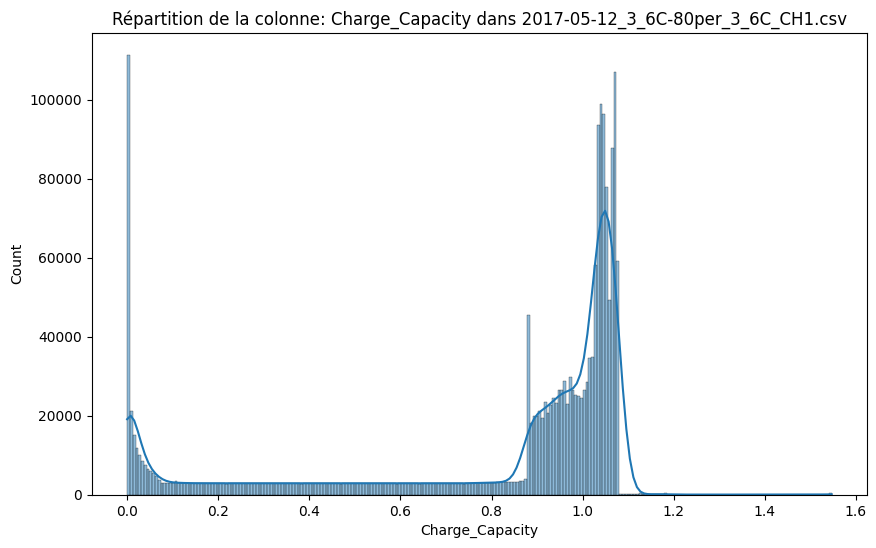

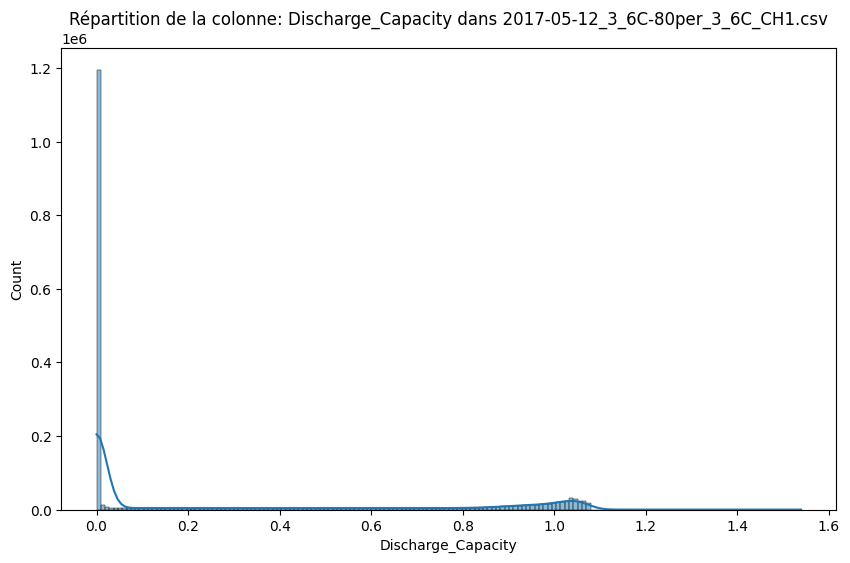

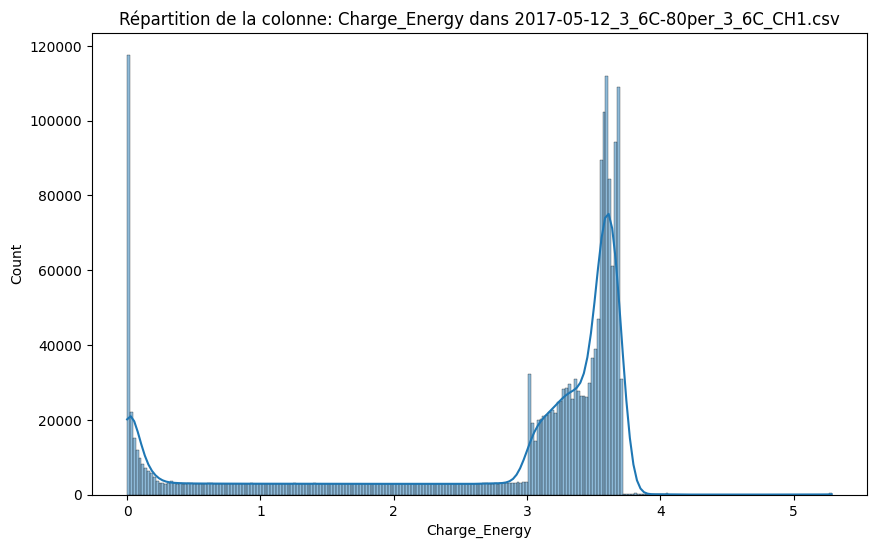

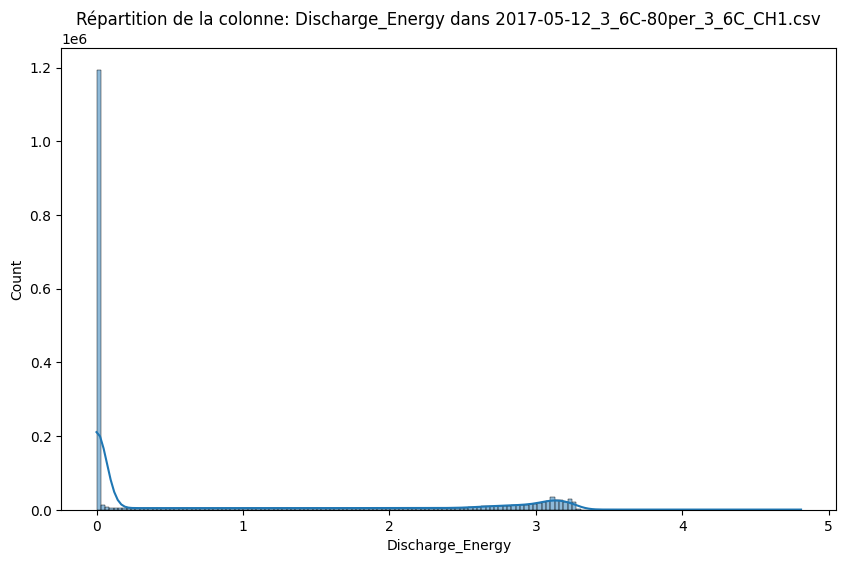

KeyboardInterrupt: 

In [9]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Chemin vers le répertoire contenant les fichiers CSV
data_path = r'C:\\Users\\pc\\Desktop\\data\\all batchs'

# Lister tous les fichiers CSV dans le répertoire donné
csv_files = [f for f in os.listdir(data_path) if f.endswith('.csv')]

# Parcourir chaque fichier CSV
for csv_file in csv_files:
    file_path = os.path.join(data_path, csv_file)
    
    # Charger le fichier CSV
    df = pd.read_csv(file_path)
    print(f"Fichier: {csv_file} - Chargé avec succès")
    print(f"Nombre de lignes et de colonnes : {df.shape}")
    print("\n")
    
    # Vérification des valeurs manquantes
    missing_data = df.isnull().sum()
    if missing_data.any():
        print(f"Fichier: {csv_file} - Valeurs manquantes détectées")
        print(missing_data[missing_data > 0])
    else:
        print(f"Fichier: {csv_file} - Aucune valeur manquante détectée")
    print("\n")
    
    # Vérification des valeurs duplicata
    duplicates = df.duplicated().sum()
    if duplicates > 0:
        print(f"Fichier: {csv_file} - {duplicates} lignes dupliquées détectées")
    else:
        print(f"Fichier: {csv_file} - Aucune ligne dupliquée détectée")
    print("\n")
    
    # Vérification des valeurs aberrantes (Outliers) pour chaque colonne numérique
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()
        if outliers > 0:
            print(f"Fichier: {csv_file} - Colonne: {column} - {outliers} valeurs aberrantes détectées")
    print("\n")
    
    # Vérification de la consistance de la colonne 'Cycle_Index' (croissance monotone)
    if 'Cycle_Index' in df.columns:
        if not df['Cycle_Index'].is_monotonic_increasing:
            print(f"Fichier: {csv_file} - La colonne 'Cycle_Index' n'est pas strictement croissante")
        else:
            print(f"Fichier: {csv_file} - La colonne 'Cycle_Index' est croissante")
    print("\n")
    
    # Vérification de la répartition des données pour chaque colonne numérique
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        plt.figure(figsize=(10, 6))
        sns.histplot(df[column], kde=True)
        plt.title(f"Répartition de la colonne: {column} dans {csv_file}")
        plt.show()
    
print("Analyse complète terminée pour tous les fichiers.")
